In [77]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
df=pd.read_csv('example_wp_log_peyton_manning.csv')

In [79]:
df

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


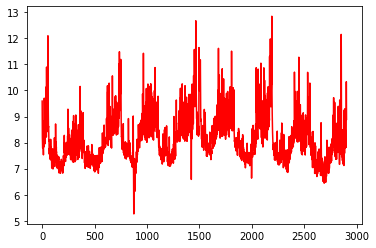

In [80]:
plt.plot(df['y'], label='vraies valeurs', color='r')

In [81]:
m=Prophet()

In [82]:
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [83]:
future=m.make_future_dataframe(periods=365) #On rajoute 365 jours de plus à la période utilisée dans le fit.

In [84]:
future

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18


In [85]:
forecast=m.predict(future)        # yhat=y_predict
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.038509,8.223651,9.441182,8.038509,8.038509,0.803012,0.803012,0.803012,0.352283,0.352283,0.352283,0.450729,0.450729,0.450729,0.0,0.0,0.0,8.841521
1,2007-12-11,8.036976,7.995405,9.172869,8.036976,8.036976,0.553114,0.553114,0.553114,0.119631,0.119631,0.119631,0.433483,0.433483,0.433483,0.0,0.0,0.0,8.590090
2,2007-12-12,8.035443,7.814437,8.983453,8.035443,8.035443,0.350515,0.350515,0.350515,-0.066656,-0.066656,-0.066656,0.417171,0.417171,0.417171,0.0,0.0,0.0,8.385958
3,2007-12-13,8.033910,7.796697,8.973509,8.033910,8.033910,0.329968,0.329968,0.329968,-0.072272,-0.072272,-0.072272,0.402239,0.402239,0.402239,0.0,0.0,0.0,8.363878
4,2007-12-14,8.032377,7.697781,8.936842,8.032377,8.032377,0.319515,0.319515,0.319515,-0.069577,-0.069577,-0.069577,0.389092,0.389092,0.389092,0.0,0.0,0.0,8.351892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.195686,7.483150,8.943924,6.822729,7.588856,1.017984,1.017984,1.017984,0.048306,0.048306,0.048306,0.969678,0.969678,0.969678,0.0,0.0,0.0,8.213670
3266,2017-01-16,7.194670,7.856113,9.347424,6.820243,7.589809,1.344002,1.344002,1.344002,0.352283,0.352283,0.352283,0.991720,0.991720,0.991720,0.0,0.0,0.0,8.538673
3267,2017-01-17,7.193654,7.581849,9.093189,6.817724,7.590134,1.132450,1.132450,1.132450,0.119631,0.119631,0.119631,1.012819,1.012819,1.012819,0.0,0.0,0.0,8.326104
3268,2017-01-18,7.192638,7.376097,8.943575,6.814505,7.590686,0.966117,0.966117,0.966117,-0.066656,-0.066656,-0.066656,1.032774,1.032774,1.032774,0.0,0.0,0.0,8.158756


In [86]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2007-12-10,8.841521,8.223651,9.441182
1,2007-12-11,8.590090,7.995405,9.172869
2,2007-12-12,8.385958,7.814437,8.983453
3,2007-12-13,8.363878,7.796697,8.973509
4,2007-12-14,8.351892,7.697781,8.936842
...,...,...,...,...
3265,2017-01-15,8.213670,7.483150,8.943924
3266,2017-01-16,8.538673,7.856113,9.347424
3267,2017-01-17,8.326104,7.581849,9.093189
3268,2017-01-18,8.158756,7.376097,8.943575


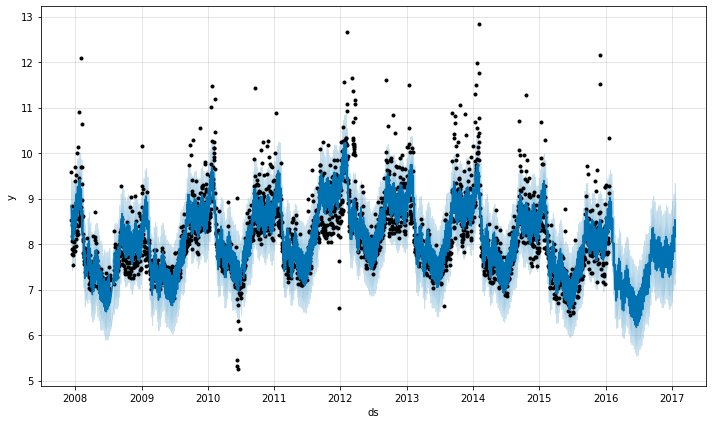

In [87]:
fig1 = m.plot(forecast)  #Les points noirs sont les observations, le modèle bleu correspond au fit. (tracé issu de prophet.plot)

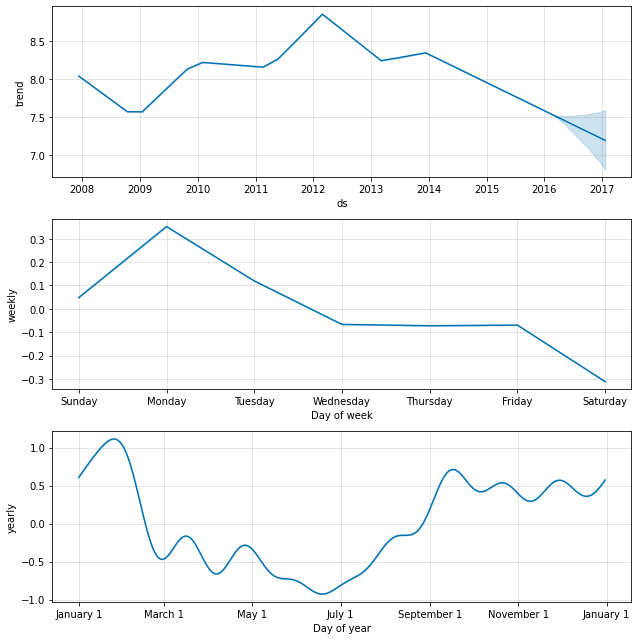

In [88]:
fig2 = m.plot_components(forecast) #(tracé issu de prophet.plot)

In [89]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)  #(tracé issu de plotly)

In [90]:
plot_components_plotly(m, forecast) #tracé issu de plotly

In [91]:
help(Prophet)

Help on class Prophet in module prophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniformly 